# Discussão sucinta da Formalização do Problema e dos objetivos pretendidos

Racionais MCs transcendem gerações e representam uma multiplicidade de experiências pessoais e contextos para inúmeras pessoas. Há até mesmo uma famosa frase que diz "para toda situação da vida, um verso dos Racionais". A motivação primordial, além de prestar homenagem a um dos maiores grupos de RAP da história, é a busca por novas linhas que se encaixem no contexto do grupo. Ao obter rimas coesas e uma progressão musical embasada, o objetivo é iniciar uma tentativa de generalização para o contexto do RAP. Os algoritmos de treinamento desempenham um papel fundamental para o sucesso desse empreendimento, requerendo a seleção cuidadosa dos métodos de classificação e o treinamento da base de dados. Assim, os principais objetivos incluem a classificação das rimas para garantir uma distribuição coesa e significativa do ponto de vista lírico. Isso será alcançado através do treinamento com a base de dados BERTimbau, adaptada ao universo Racionais MCs, de modo a incorporar o contexto previamente estabelecido. O resultado esperado é a geração de novas letras de músicas que ressoem com a essência e a autenticidade do grupo.


# Análise Exploratória dos Dados, detalhando cada etapa realizada, justificando as escolhas e justificando as transformações efetuadas.

## A base de dados é adequada?
Inicialmente a ideia de utilizar letras do Racionais foi boa, pois os textos são grandes e dificilmente repetem-se. Porém, a necessidade do aprendizado do contexto das letras é um pouco mais complicado de ser compreendido pelo algoritmo.
### Existem dados faltantes? Como foram tratados?
Nesta segunda etapa, a intenção é tentar aumentar o entendimento do contexto, inserindo mais letras do Racionais e, também, algumas participações do grupo ou dos artistas individualmente para que possa ser entendido o universo de interesse.
### Existem variáveis categóricas?
Sim, as rimas. As transformações necessárias envolvem a predição de novas letras a partir das rimas que são sorteadas. Sendo assim, as rimas necessitam ser ordenadas em pares para que possam ser sorteadas.
### Principais Transformações
A geração de novas letras se torna mais fácil a partir da utilização do modelo BERTimbau, pois já é um modelo pré-treinado para geração de texto e predição de palavras. A maior dificuldade vem na criação de novas letras com uma qualidade lírica mais apurada e ter uma acertividade na predição de palavras a partir de labels.

As transformações mais importantes neste aspecto serão as rimas e/ou pares de rimas, onde deve-se descobrir qual a melhor forma de gerar novas linhas a partir destas. O pré-processamento é uma etapa importante para deixar o texto limpo e legível para o modelo. Além disso, o aumento da base de dados, que foi citado acima, pode ser uma ferramenta valiosa para aumentar o nível de entendimento do "universo" em questão, no treinamento do modelo. E, por fim, a métrica de pontuação/peso para a escolha das novas rimas e, consequentemente, das novas linhas geradas será primordial para um bom desempenho.

# Informações estatísticas e Visualização de algumas das features principais

## Importanto, pre processando e exibindo o texto do Racionais

In [ ]:
import re
import requests

def preprocessar_texto(texto):
    # Remover caracteres especiais, pontuação e números
    texto = re.sub(r'[^\w\s]', '', texto)
    # Converter para minúsculas
    texto = texto.lower()
    return texto

# URL do arquivo RAW
#url_arquivo = 'https://pastebin.com/raw/U7UKgtPe'
url_arquivo = 'https://raw.githubusercontent.com/JotaChina/Computer-intelligence/update%231/TP2/RacionaisLyrics.raw'


# Fazer solicitação HTTP para obter o conteúdo do arquivo
response = requests.get(url_arquivo)
if response.status_code == 200:
    # Extrair o texto do conteúdo da resposta
    texto_raw = response.text
    # Pré-processar o texto
    texto_preprocessado = preprocessar_texto(texto_raw)
    # Exibir o texto pré-processado
    print(texto_preprocessado)
else:
    print("Falha ao fazer solicitação HTTP")

na zona sul ei ei
essa é dedicada para todos os mcs do brasil
que veio do sofrimento rimando
e exercendo a profissão perigo
é tudo nosso tudo nosso tudo nosso

quem é você que fala o que quer
que se esconde igual mulher por trás da caneta
vai zé buceta
sai da sombra
cai então toma seu mundo é o chão
quem tem cu tem medo e treme
mostra a cara mister m
vem pra ver como é bom
poder chegar na alta cúpula e entrar sem pagar
simpatia promessas vazias caô caô

nem vem nem vem
sofredor aqui tem sensor
não tem rei não tem réu
pai de mel bam bam bam
quem age certo é que fala é que pam
andarilho ou idoso ou bom criminoso igual
depois da pólvora não tem cabuloso
eu nunca quis nem vou agradar todo mundo e rir pra tudo
quanto é que se diz vagabundo
o rei dos reis foi traído na terra
morrer como o homem é o prêmio da guerra
sem menção honrosa sem massagem
a vida é loca nego nela eu tô de passagem

zum zum zum zum zum
meu cérebro balançou
século xxi
revolução não é pra qualquer um
só quem é
kamikaze l

## Exibição das rimas mais utilizadas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


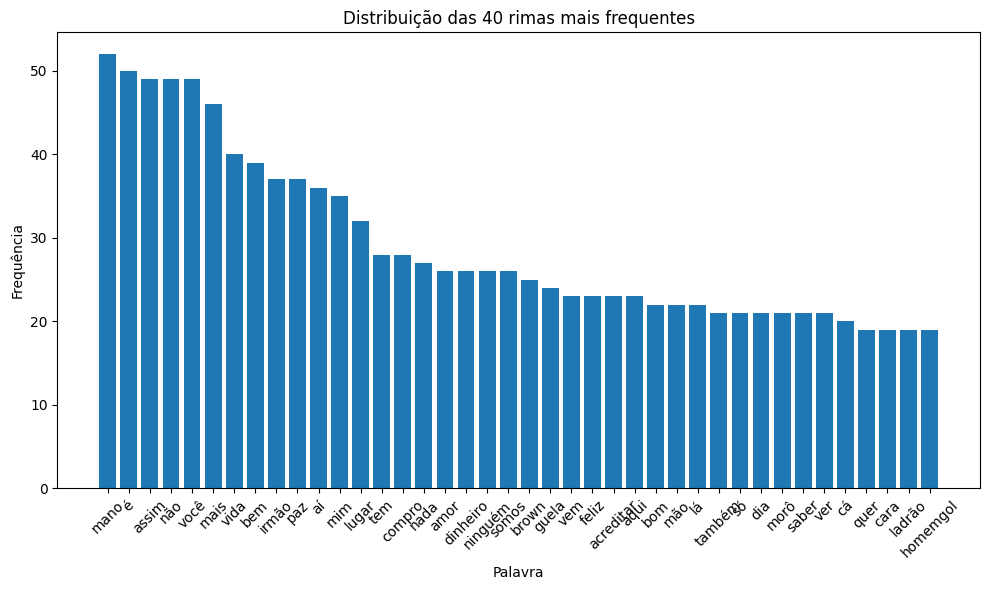

In [ ]:
import re
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

# Baixar os recursos necessários do NLTK (caso ainda não tenham sido baixados)
nltk.download('punkt')

# Define uma expressão regular para encontrar a última palavra de cada linha
padrao_ultima_palavra = re.compile(r'\b(\w+)\s*$')

# Lista para armazenar as rimas tokenizadas
rimas_tokenizadas = []

# Para cada linha no texto, encontra a última palavra e tokeniza as rimas
for linha in texto_preprocessado.split('\n'):
    match = padrao_ultima_palavra.search(linha.lower())
    if match:
        ultima_palavra = match.group(1)
        # Tokeniza a última palavra da linha
        tokens = word_tokenize(ultima_palavra, language='portuguese')
        rima_tokenizada = [token.lower() for token in tokens if token.isalnum()]
        rima_tokenizada = ' '.join(rima_tokenizada)
        # Adiciona a rima tokenizada à lista
        rimas_tokenizadas.append(rima_tokenizada)

# Conta a frequência das rimas tokenizadas
frequencia_rimas = {}
for rima in rimas_tokenizadas:
    frequencia_rimas[rima] = frequencia_rimas.get(rima, 0) + 1

# Ordena o dicionário de frequência das rimas
frequencia_rimas_ordenada = dict(sorted(frequencia_rimas.items(), key=lambda item: item[1], reverse=True))

# Extrai as palavras e suas frequências ordenadas
palavras = list(frequencia_rimas_ordenada.keys())
frequencias = list(frequencia_rimas_ordenada.values())

# Plota o gráfico de barras da frequência das rimas
plt.figure(figsize=(10, 6))
plt.bar(palavras[:40], frequencias[:40])  # Plota apenas as 40 palavras mais frequentes
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Distribuição das 40 rimas mais frequentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exibindo os caracteres mais utilizados no texto

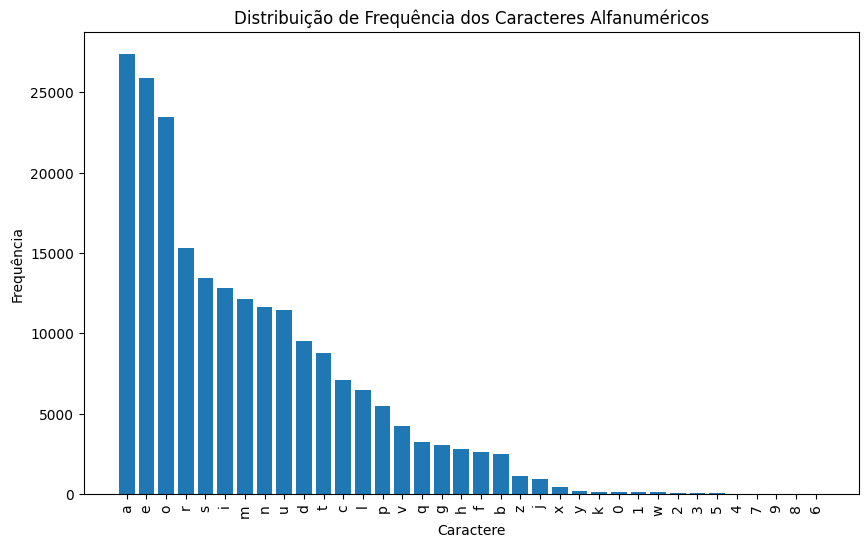

In [ ]:
import matplotlib.pyplot as plt
import re

def plot_alphanumeric_text_distribution(text):
    # Remover caracteres não alfanuméricos
    text = re.sub(r'[^a-zA-Z0-9]', '', text)

    # Contar a frequência de cada caractere no texto
    char_frequency = {}
    for char in text:
        char_frequency[char] = char_frequency.get(char, 0) + 1

    # Ordenar os caracteres por frequência
    sorted_char_frequency = sorted(char_frequency.items(), key=lambda x: x[1], reverse=True)

    # Extrair os caracteres e suas frequências
    chars = [pair[0] for pair in sorted_char_frequency]
    frequencies = [pair[1] for pair in sorted_char_frequency]

    # Plotar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(chars, frequencies)
    plt.xlabel('Caractere')
    plt.ylabel('Frequência')
    plt.title('Distribuição de Frequência dos Caracteres Alfanuméricos')
    plt.xticks(rotation=90)
    plt.show()

plot_alphanumeric_text_distribution(texto_preprocessado)

## Imprimindo as palavras mais frequentes no texto

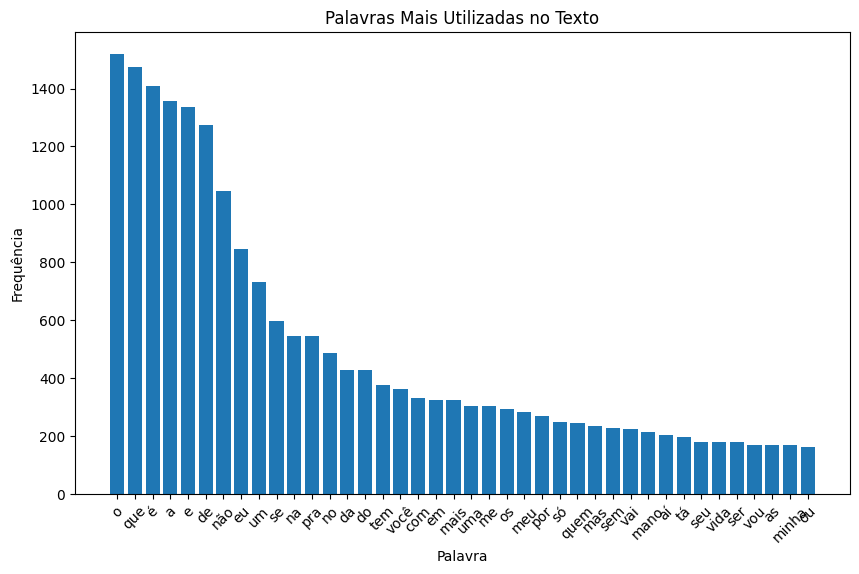

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt

def find_most_common_words(text, n=10):
    # Dividir o texto em palavras
    words = re.findall(r'\b\w+\b', text.lower())

    # Contar a frequência de cada palavra
    word_frequency = Counter(words)

    # Selecionar as palavras mais utilizadas
    most_common_words = word_frequency.most_common(n)

    return most_common_words

# Encontrar as 40 palavras mais utilizadas
most_common_words = find_most_common_words(texto_preprocessado, n=40)

# Extrair as palavras e suas frequências
words = [word for word, _ in most_common_words]
frequencies = [frequency for _, frequency in most_common_words]

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Palavras Mais Utilizadas no Texto')
plt.xticks(rotation=45)
plt.show()

## Análise textual

In [ ]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 45.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("pt_core_news_sm")

# Processar o texto com spaCy
doc = nlp(texto_preprocessado)

# Lista para armazenar os verbos e substantivos
verbos = []
substantivos = []

# Iterar pelas palavras no documento processado
for token in doc:
    # Verificar se o token é um verbo
    if token.pos_ == "VERB" and token.tag_.startswith("V"):
        verbos.append(token.text)
    # Verificar se o token é um substantivo
    elif token.pos_ == "NOUN":
        substantivos.append(token.text)

# Contar a frequência de ocorrência dos verbos e substantivos
contagem_verbos = Counter(verbos)
contagem_substantivos = Counter(substantivos)

# Extrair os verbos e substantivos mais comuns (top 20)
top_verbos = contagem_verbos.most_common(20)
top_substantivos = contagem_substantivos.most_common(20)

### Verbos

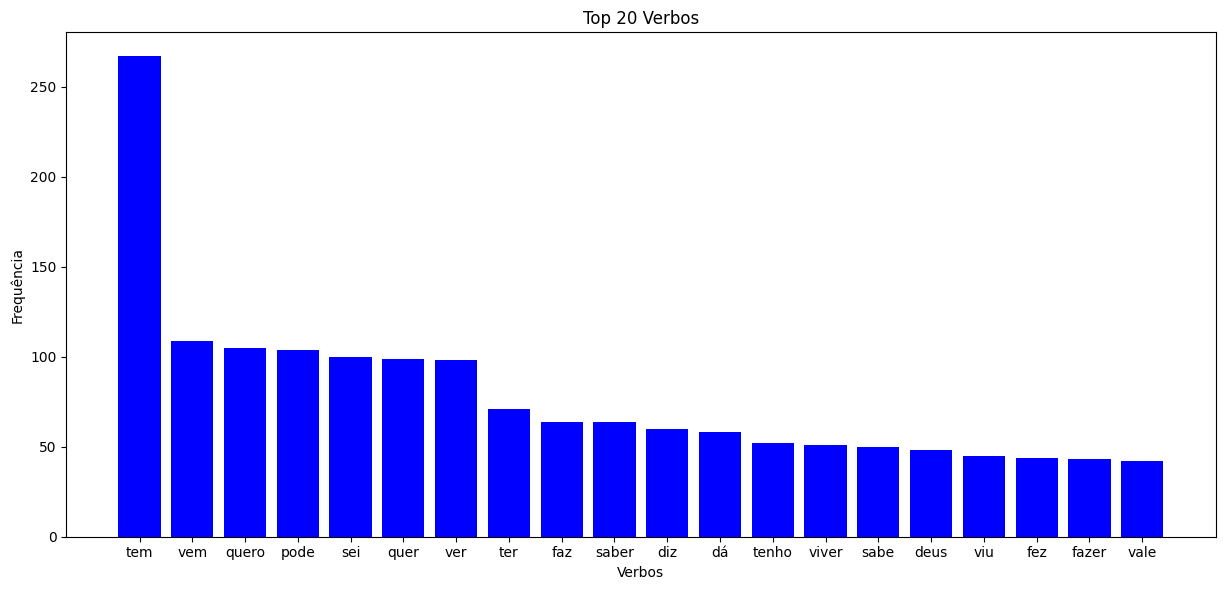

In [ ]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.bar([v[0] for v in top_verbos], [v[1] for v in top_verbos], color='blue')
plt.xlabel('Verbos')
plt.ylabel('Frequência')
plt.title('Top 20 Verbos')

plt.tight_layout()
plt.show()

### Substantivos

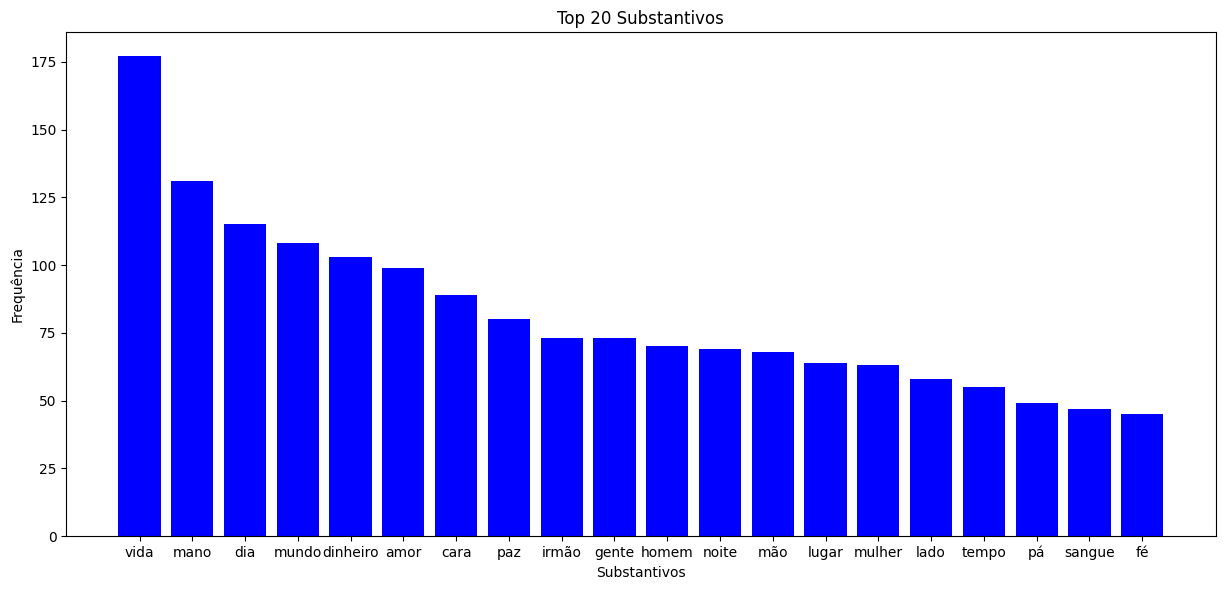

In [ ]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 2)
plt.bar([s[0] for s in top_substantivos], [s[1] for s in top_substantivos], color='blue')
plt.xlabel('Substantivos')
plt.ylabel('Frequência')
plt.title('Top 20 Substantivos')

plt.tight_layout()
plt.show()

Ao longo desta fase de trabalho, diversas decisões de projeto foram ponderadas e implementadas para garantir o progresso eficaz da pesquisa. Destacamos as seguintes considerações:

1. **Pré-processamento do texto**: Foi realizada uma série de etapas de pré-processamento no texto antes de sua tokenização. Estas incluíram a remoção de caracteres especiais, pontuação e números, além da conversão do texto para minúsculas. Tais medidas visavam limpar e padronizar o texto, preparando-o para o subsequente processo de tokenização.

2. **Exploração do texto**: O corpus textual foi submetido a uma análise exploratória abrangente, englobando a distribuição de classes gramaticais, a identificação das palavras mais frequentes, dos caracteres predominantes, e das rimas mais recorrentes. Esta investigação proporcionou insights valiosos sobre a estrutura e o conteúdo do texto, fornecendo um contexto rico para orientar as etapas subsequentes do trabalho.

3. **Seleção do modelo pré-treinado**: Optou-se por testar o modelo BERTimbau pré-treinado em língua portuguesa disponibilizado pela comunidade do Hugging Face (rufimelo/Legal-BERTimbau-base). Essa escolha foi motivada pela disponibilidade do modelo e por sua eficácia reconhecida em tarefas de processamento de linguagem natural em português.

4. **Tokenização**: O processo de tokenização foi realizado utilizando o tokenizador associado ao modelo BERT. Um critério relevante adotado foi a definição de um limite máximo de tokens, visando garantir a eficiência computacional durante o processamento subsequente.

5. **Treinamento do modelo**: Inicialmente pensa-se em treinar o modelo utilizando uma LSTM para que haja mais acertividade na elaboração das novas linhas de RAP, mantendo coesão textual e imersão na temática do gênero. Esta ideia foi vista na grande maioria dos trabalhos que foram encontrados durante as pesquisas, porém, o baixo score desta alternativa pode acarretar em uma outra abordagem, possivelmente a utilização de algum sistema de recomendação, por exemplo.

6. **Procedimentos de testes**: Para testes iniciais definiu-se a utilização de predição a partir de labels ([MASK]) para verificar o score do modelo escolhido para inferir palavras a partir de uma entrada que faça parte do contexto das letras de música selecionadas como a base de dados de treinamento. Quando o resultado estiver satisfatório para as predições, a próxima etapa será a geração de novas linhas de RAP a partir do modelo pré-treinado.

7. **Avaliação da acurácia**: Durante o treinamento, uma métrica apropriada será implementada para avaliar a acurácia das previsões do modelo. Este procedimento permitirá uma monitoração contínua do desempenho do modelo ao longo do tempo, identificando áreas passíveis de aprimoramento.

8. **Ampliação da base de dados**: Observou-se a necessidade de incrementar o volume de dados utilizados para o treinamento do modelo, a fim de assegurar uma compreensão mais abrangente do universo de pesquisa e, por conseguinte, a geração de letras mais coesas e relevantes, bem como aprimorar a capacidade preditiva do modelo.

Essas decisões servem como fundamento para as próximas etapas do projeto, nas quais serão delineadas estratégias adicionais relacionadas à seleção de algoritmos e à metodologia de treinamento a ser adotada.

# Exemplo de utilização do modelo pré-treinado BERTimbau

In [ ]:
from transformers import AutoModelForMaskedLM
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("rufimelo/Legal-BERTimbau-base")
model = AutoModelForMaskedLM.from_pretrained("rufimelo/Legal-BERTimbau-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/863 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

## Fazendo predições através de um label

Alguns testes são feitos a partir da predição de palavras para completar as frases com o auxílio de um label ([MASK])

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForMaskedLM
from  transformers import pipeline

In [ ]:
pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)
pipe('Ser ou não ser, eis a [MASK]')
#Clichê, acertou de primeira com score alto.

[{'score': 0.9962694644927979,
  'token': 4162,
  'token_str': 'questão',
  'sequence': 'Ser ou não ser, eis a questão'},
 {'score': 0.000817098596598953,
  'token': 119,
  'token_str': '.',
  'sequence': 'Ser ou não ser, eis a.'},
 {'score': 0.00046225127880461514,
  'token': 3087,
  'token_str': 'decisão',
  'sequence': 'Ser ou não ser, eis a decisão'},
 {'score': 0.0004205824516247958,
  'token': 4145,
  'token_str': 'razão',
  'sequence': 'Ser ou não ser, eis a razão'},
 {'score': 0.0003508694644551724,
  'token': 10573,
  'token_str': 'pergunta',
  'sequence': 'Ser ou não ser, eis a pergunta'}]

In [ ]:
pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)
pipe('A [MASK] cheia, clareia as ruas do Capão')
#Acertou de primeira, porém com score baixo ainda.

[{'score': 0.2297157198190689,
  'token': 13943,
  'token_str': 'lua',
  'sequence': 'A lua cheia, clareia as ruas do Capão'},
 {'score': 0.21356083452701569,
  'token': 1991,
  'token_str': 'água',
  'sequence': 'A água cheia, clareia as ruas do Capão'},
 {'score': 0.06903970241546631,
  'token': 2954,
  'token_str': 'noite',
  'sequence': 'A noite cheia, clareia as ruas do Capão'},
 {'score': 0.05121888220310211,
  'token': 596,
  'token_str': 'tempo',
  'sequence': 'A tempo cheia, clareia as ruas do Capão'},
 {'score': 0.04503914341330528,
  'token': 7856,
  'token_str': 'Lua',
  'sequence': 'A Lua cheia, clareia as ruas do Capão'}]

In [ ]:
#pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)
pipe('Hoje eu sou ladrão, [MASK] 157')
#Acertou na 4 tentativa

[{'score': 0.06270169466733932,
  'token': 15212,
  'token_str': 'tenho',
  'sequence': 'Hoje eu sou ladrão, tenho 157'},
 {'score': 0.051007021218538284,
  'token': 123,
  'token_str': 'a',
  'sequence': 'Hoje eu sou ladrão, a 157'},
 {'score': 0.04901750385761261,
  'token': 712,
  'token_str': 'aos',
  'sequence': 'Hoje eu sou ladrão, aos 157'},
 {'score': 0.0418819934129715,
  'token': 4319,
  'token_str': 'artigo',
  'sequence': 'Hoje eu sou ladrão, artigo 157'},
 {'score': 0.02335619367659092,
  'token': 1328,
  'token_str': 'art',
  'sequence': 'Hoje eu sou ladrão, art 157'}]

  Foi possível observar que o modelo já faz algumas predições corretas de acordo com o texto, nas duas últimas predições. Com a aplicação de métodos de treinamento para o modelo, de acordo com a base de dados que foi inserida para treino, é esperado que as predições tenham uma assertividade maior.


## Revisão da Literatura
Os trabalhos destacados abaixo trazem conceitos que podem e, possívelmente, serão aplicados neste trabalho. Pois os autores estão buscando a geração de texto a partir de letras musicais. O treinamento de uma rede LSTM é um dos conceitos mais utilizados pelos trabalhos que foram encontrados durante a pesquisa. Porém, no decorrer dos feedbacks e também em pesquisas, é visto com bons olhos a aplicação de modelos como BERTimbau, que já foi exibido acima e está sendo o instrumento escolhido.



* Gerando novas letras do Kanye West a partir de LSTM
https://github.com/robbiebarrat/rapping-neural-network
  
  O autor buscava gerar novas letras do Kanye West a partir de um LSTM. Porém, o contexto de geração é abstrato, podendo gerar letras de qualquer artista que você alimente a base de dados ou, até mesmo, de um gênero. Porém, está configurado para funcionar no idioma Inglês, neste trabalho teremos a tentativa de fazer algo parecido com a abordagem de Robbie, porém, para o Português.

* Gerando linhas de RAP a partir de uma rede neural
https://github.com/vidursatija/rhymenet

  O autor tem a inteção de gerar novas letras de RAP a partir de uma LSTM onde cada palavra tem 2 incorporações. Uma delas é a incorporação semântica e a outra é a incorporação de rima, que é extraída do dicionário nltk cmu. O modelo então aprende com letras de RAP que foram previamente inseridas na base de dados de treinamento da LSTM e, assim, prevê novas letras.

* Gerando letras musicais utilizando uma rede neural recorrente LSTM https://repositorio.ufc.br/bitstream/riufc/49519/1/2019_tcc_jsjuliani.pdf

  O autor busca, em seu TCC, fazer predição de letras de músicas, com uma LSTM, a partir de uma base de dados que foi selecionada e composta por letras do Racionais MCs, Henrique e Juliano e também do grupo Raça Negra. Compreender o funcionamento da predição de letras, pode ser bastante útil para entender como gerar novas letras. Pois as letras são geradas a partir dos labels (palavras) e o contexto associado a eles. Isso pode ser fundamental para a geração de novas linhas de RAP a partir de uma palavra, por exemplo.

Estes são alguns dos trabalhos mais relevantes que foram encontrados durante as pesquisas para este trabalho.

A utilização de uma LSTM treinada a partir do modelo BERTimbau (previamente treinado com as letras do Racionais e/ou outros artistas do RAP) pode ter um alto desemepenho, porém será mais custoso computacionalmente. Durante a próxima etapa, onde serão aplicados os algoritmos de treino e métricas de desempenho destes, serão levantadas novas informações e isso trará uma nova perspectiva sobre o desenvolvimento, fazendo com que a decisão do modelo a ser utilizado seja cravada, de fato.

## Como pretende avaliar o impacto dessas decisões na etapa seguinte deste trabalho?
A partir dos testes de predição com o modelo pre treinado (BERTimbau) foi possível observar que algumas predições conseguem ter êxito, porém, não necessariamente vão ter um bom score, o próximo passo será a geração de novas linhas de RAP.
Ao aumentar a demanda de testes e iniciar o treinamento do modelo com a base de dados mais robusta, contendo as letras de RAP atualizadas, serão feitos novos testes de predição.
Caso o score aumente, consideravelmente, é possível complementar o algoritmo com a criação das novas linhas, de fato.
As rimas serão classificadas de acordo com a sua frequência e, possívelmente terá a análise de sentimento envolvida no texto. Em caso de uma análise coesa, é grande a probabilidade desta convergir à tristeza, com isso pode ser implementado um método de penalidade que compare a frequência das rimas x quantidade de vezes que a palavra foi utilizada no texto gerado x sentimento da palavra.
Possívelmente isso refetirá em um texto coeso e com a temática central das letras do gênero musical.

# Metodologia para execução das simulações computacionais
O principal objetivo das simulações será gerar novas linhas de rap que apresentem rimas, coesão temática e sentido lírico. Para alcançar isso, será crucial obter pontuações elevadas nas predições. Os testes com rótulos serão fundamentais para monitorar o comportamento do modelo durante o treinamento e a aplicação de métodos de aprendizado não supervisionado.

Em relação às rimas e ao contexto textual, serão realizados testes para avaliar a geração de novas linhas. Coletaremos os pares de rimas do texto original para utilizá-los como entrada na classificação das novas rimas.

Inicialmente, as rimas serão categorizadas em:

* Pares de rimas, mantendo a ordem original, para garantir que as novas linhas tenham as mesmas rimas que as letras originais;
* Rimas idênticas ou com a mesma terminação, facilitando sua incorporação e priorizando a coesão textual;
* Rimas posicionadas na metade e no final dos versos, visando melhorar a métrica e a fluidez lírica, embora possam requerer mais esforço na implementação;
* Divisão da base de dados entre treinamento e teste, o que pode resultar em uma maior precisão final do algoritmo.

## Qual(is) Algoritmo(s) de Machine/Deep Learning pretende utilizar?
Durante o processo discutido, focou-se principalmente no uso de modelos de linguagem pré-treinados, especificamente o modelo BERTimbau. BERTimbau é um modelo BERT pré-treinado para o Português Brasileiro que alcança performances de última geração em três tarefas de NLP: Reconhecimento de Entidade Nomeada, Similaridade Textual de Sentença e Reconhecimento de Envio Textual. Está disponível em dois tamanhos, base e grande. Ele captura a bidirecionalidade do contexto em uma sequência de palavras, permitindo uma compreensão mais profunda e contextualizada do texto.
Embora o BERT seja frequentemente usado em tarefas de NLP (Processamento de Linguagem Natural), como classificação de texto, marcação de sequência e preenchimento de lacunas, neste caso, está sendo utilizado para gerar novas letras de músicas com a temática do Racionais. Isso será feito treinando o modelo BERTimbau em um conjunto de dados composto por letras de músicas pré-processadas e tokenizadas, por um tokenizador BERTimbau, do Racionais.

Além do BERTimbau, outros algoritmos de machine learning não foram diretamente utilizados neste processo. No entanto, abaixo podem ser observadas algumas outras abordagens que podem ser utilizadas em caso de baixo aproveitamento da abordagem atual.

1. **GPT (Generative Pre-trained Transformer)**: Similar ao BERT, o GPT é uma arquitetura de modelo de linguagem baseada em transformers, mas foca na geração de texto. Ele é treinado de forma não supervisionada em grandes corpora de texto e é capaz de gerar texto coerente e contextualmente relevante. Pode ser encontrado em: https://huggingface.co/docs/transformers/model_doc/gpt2

    Um modelo pré-treinado com letras de músicas, contendo Racionais MC's, foi encontrado **GPT-2 Small Portuguese Lyrics**, disponível em: https://huggingface.co/rsmonteiro/gpt2-small-portuguese-lyrics, porém não teve um desempenho satisfatório nem em testes primários de geração de texto.

    Outros modelos que podem ser testados:
    
    * pierreguillou/gpt2-small-portuguese, disponível em: https://huggingface.co/pierreguillou/gpt2-small-portuguese

    * HeyLucasLeao/gpt-neo-small-portuguese, disponível em: https://huggingface.co/HeyLucasLeao/gpt-neo-small-portuguese


2. **LSTM (Long Short-Term Memory)**: LSTM é uma arquitetura de rede neural recorrente (RNN) projetada para lidar com sequências de dados, como texto. É conhecido por capturar dependências de longo prazo em dados sequenciais, o que o torna útil para tarefas de geração de texto, tradução automática, entre outras. O exemplo de aplicação desta ferramenta neste estudo pôde ser vista no trabalho anterior que foi encaminhado no portal acadêmico. É uma candidata para ser utilizada no treinamento da rede neural, para a geração das novas linhas. Um exeplo pode ser visto em: https://github.com/robbiebarrat/rapping-neural-network

3. **Seq2Seq (Sequence-to-Sequence)**: Este é um framework que consiste em dois modelos RNN, um codificador e um decodificador, usado principalmente para tarefas de tradução automática e geração de respostas em chatbots. Ele é capaz de traduzir uma sequência de entrada em uma sequência de saída. Não obteve êxito em testes primários. Estão sendo feitas pesquisas para escolher o modelo em: https://huggingface.co/pierreguillou/t5-base-qa-squad-v1.1-portuguese

4. **Word2Vec**: Embora não seja um modelo de geração de texto, é um algoritmo popular de embedding de palavras que mapeiam palavras em vetores de números reais. Esses vetores de palavras podem ser usados como entrada para outros modelos de machine learning ou deep learning em tarefas de processamento de linguagem natural. Estão sendo feitas pesquisas para escolher o modelo em: https://huggingface.co/Word2vec

5. **XLM-RoBERTa**: Este é um modelo da família RoBERTa (Robustly optimized BERT approach) treinado em múltiplos idiomas, incluindo o português. Ele tende a fornecer bons resultados em tarefas de PLN multilíngues. Pode ser encontrado em: https://huggingface.co/docs/transformers/model_doc/xlm-roberta

Nesta próxima etapa serão testados estes modelos e o resultado da utilização deles na geração de novas letras, será medida a partir da coesão textual que for apresentada nos resultados. Uma das maiores limitações é sobre o texto ser em português, onde têm-se uma gama muito menor de bibliotecas e modelos pré-treinados nesta língua. Porém, alguns foram encontrados e serão testados.


## Qual(is) métrica(s) de desempenho pretende utilizar?

Para avaliar o desempenho de modelos de processamento de linguagem natural (NLP) e geração de texto, serão testadas várias métricas que foram sendo encontradas durante pesquisas, sendo elas:

1. **Perplexidade**: É uma métrica comum para modelos de linguagem que mede quão bem o modelo é capaz de prever uma sequência de palavras. Quanto menor a perplexidade, melhor o desempenho do modelo.

2. **BLEU (Bilingual Evaluation Understudy)**: É uma métrica de avaliação automática usada para avaliar a qualidade de traduções geradas por sistemas de tradução automática. Ela compara a saída do sistema com uma ou mais traduções de referência.

3. **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**: É uma família de métricas usadas para avaliar a qualidade de resumos automáticos e geração de texto. Ele compara a similaridade entre o texto gerado e um ou mais textos de referência, com base em métricas de sobreposição de palavras.


4. **Accuracy (Precisão)**: Para tarefas de classificação de texto, como análise de sentimento, classificação de tópicos, entre outras, a precisão pode ser uma métrica relevante que mede a proporção de previsões corretas em relação ao total de previsões.


5. **F1-Score**: É uma métrica que combina precisão e recall em uma única pontuação, calculada como a média harmônica entre os dois. É útil em tarefas de classificação binária e multiclasse.

6. **Perda (Loss)**: Em treinamentos de modelos de aprendizado supervisionado, a perda é frequentemente usada como uma métrica para avaliar a eficácia do modelo durante o treinamento. O objetivo é minimizar a perda ao longo do tempo.

Durante os testes e, a partir da observação do modelo pré-treinado agindo sobre as criações, é possível testar as métricas acima, caso alguma seja eficiente para a avaliação do desempenho será aplicada na próxima etapa, podendo ser utilizada mais de uma destas métricas ou, até mesmo, utilizar uma combinação destas. No caso da avaliação não ser suficiente ou não chegar a um nível ótimo, serão pesquisadas novas métricas para aplicação.
Além destas, é possível avaliar o modelo a partir do feedback humano, verificando as predições a partir de labels e, também, das letras que forem geradas, na próxima etapa. Isso pode auxiliar na implementação de ajustes finos que sejam necessários.

# Referências

  * ANAND, Advaith et al. Rap Lyric Generation: A Phoneme-Based LSTM Approach.
  https://michaelshum.github.io/files/rap-lyric-generation.pdf  POTASH, Peter;
  
  * JULIANI, Jeferson da Silva. Gerando letras musicais utilizado uma rede neural recorrente LSTM-Long Short-Term Memory. 2019.
  https://repositorio.ufc.br/bitstream/riufc/49519/1/2019_tcc_jsjuliani.pdf

  * POTASH, Peter; ROMANOV, Alexey; RUMSHISKY, Anna. Ghostwriter: Using an lstm for automatic rap lyric generation. In: Proceedings of the 2015 Conference on Empirical Methods in Natural Language Processing. 2015. p. 1919-1924.
  https://aclanthology.org/D15-1221.pdf

  * ROMANOV, Alexey; RUMSHISKY, Anna. Ghostwriter: Using an lstm for automatic rap lyric generation. In: Proceedings of the 2015 Conference on Empirical Methods in Natural Language Processing. 2015. p. 1919-1924.
  https://arxiv.org/pdf/2107.01875